# Homework 4 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (50 Points)

For this question we will re-use the "mnist_784" dataset from Homework 3.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). **- 5 Points**

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
import pandas as pd
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) Train a KNN model (on the training set) with any value of K you want and print out the confusion matrix when predicting the testing set. How well did your model perform? Which classes were most confused? - **5 Points**

Accuracy on testing set =  0.9722142857142857


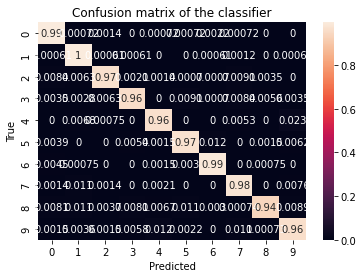

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_test_predictions = knn.predict(X_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Class 8 is the lowest

c) For K ranging from 1 to 20:
1. train a KNN on the training data - **3 points**
2. record the training and testing accuracy - **3 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  **- 5 points**

In [3]:
test_scores = []
train_scores = []
for i in range (1,21):
    model = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    model.fit(X_train, Y_train)
    Y_test_predictions = knn.predict(X_test)
    test_scores.append(accuracy_score(Y_test, Y_test_predictions))
    train_scores.append(model.score(X_train, Y_train))

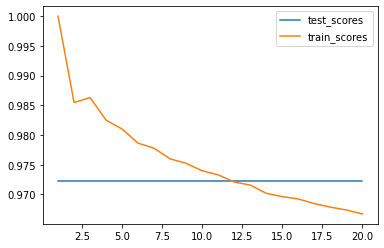

In [4]:
x = list(range(1,21))
plt.plot(x, test_scores, label = "test_scores")
plt.plot(x, train_scores, label = "train_scores")
plt.legend()
plt.show()

k=1 is optimal because the training set accuracy is pretty consistent but the testing set accuracy is the highest when k is smallest

d) Using the optimal model found in c), plot the confusion matrix and discuss. - **5 points**

Accuracy on testing set =  0.9723571428571428


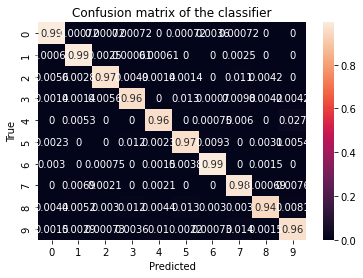

In [5]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn.fit(X_train, Y_train)
Y_test_predictions = knn.predict(X_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The accuracy is pretty consistent and high in all classes

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). **- 10 points**

In [11]:
from sklearn.model_selection import cross_validate
cv_scores = []
model_scores = []
for i in range (1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_validate(model, X, y, cv=10, n_jobs=-1, scoring=('accuracy'),return_train_score=True)
    cv_scores.append(scores['test_score'].mean())
    model_scores.append(scores['train_score'].mean())

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

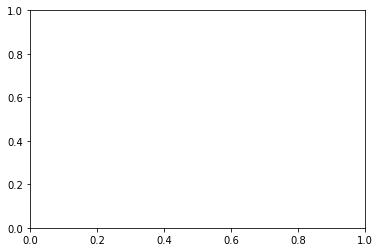

In [14]:
plt.plot(x, model_scores, label = "model_scores")
plt.plot(x, cv_scores, label = "cv_scores")
plt.legend()
plt.show()

dcdc

f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. **- 7 points**

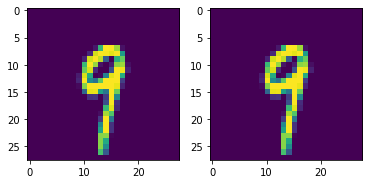

In [28]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X)
index = neigh.kneighbors([X[600]],return_distance=False)
plt.subplot(1,2,1)
plt.imshow(X[600].reshape(28, 28))
plt.subplot(1,2,2)
plt.imshow(X[index[0][0]].reshape(28, 28))

g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension. **- 7 points**

In [29]:
from sklearn.pipeline import make_pipeline
cv_scores = []
model_scores = []
pca = PCA(n_components=10)
for i in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = make_pipeline(pca, knn)
    scores = cross_validate(model, X, y, cv=10, n_jobs=-1, scoring=('accuracy'),return_train_score=True)
    cv_scores.append(scores['test_score'].mean())
    model_scores.append(scores['train_score'].mean())

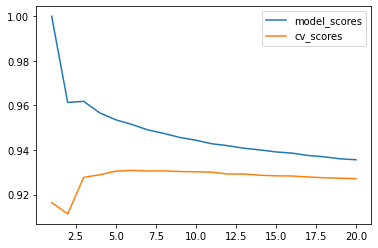

In [30]:
plt.plot(x, model_scores, label = "model_scores")
plt.plot(x, cv_scores, label = "cv_scores")
plt.legend()
plt.show()

It runs way faster than e) and the result is pretty much the same. I use n_components=10 because it preverses the most important data points

## Exercise 2 (50 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Informed by homework 1, handle the missing values in the datasets. Briefly explain. **-5 points**

In [24]:
df_train = pd.read_csv('./train.csv', index_col = 0)
df_test = pd.read_csv('./test.csv', index_col = 0)
def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean(axis=0))
df_train['Age'] = replace_with_mean(df_train)
df_test['Age'] = replace_with_mean(df_test)
df_train.drop(columns=['Cabin'])
df_test.drop(columns=['Cabin'])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S


I replaced the missing age with mean and dropped the cabin column because the cabin column doesn't really matter

b) Informed by homework 1, add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

In [37]:
def to_numerical(df):
    return df['Sex'].replace({'male':0, 'female':1})
df_train['Sex'] = to_numerical(df_train)
df_test['Sex'] = to_numerical(df_test)
df_train['total'] = df_train['SibSp']+df_train['Parch']
df_test['total'] = df_test['SibSp']+df_test['Parch']

I use number to represent the gender and total the number of spouses/parents/children in one column

c) Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain. **- 10 points**

PassengerID, name, ticket, embarked are removed because they don't represent the social class or anything about the passenger 

In [65]:
from sklearn import tree
X_train = df_train[['Pclass','Sex','Age','Fare','total']]
Y_train = df_train['Survived']
clf = tree.DecisionTreeClassifier(max_depth=20)
clf = clf.fit(np.array(X_train), np.array(Y_train))

I used 20 because there are 5 columns and each columns have approximately 4 conditions

d) Plot the decision tree. Briefly explains how it works. **- 5 points**

[Text(0.5179200029848422, 0.9761904761904762, 'X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.18866392623546513, 0.9285714285714286, 'X[2] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.013289036544850499, 0.8809523809523809, 'X[4] <= 3.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.006644518272425249, 0.8333333333333334, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.019933554817275746, 0.8333333333333334, 'X[4] <= 5.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.013289036544850499, 0.7857142857142857, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.026578073089700997, 0.7857142857142857, 'X[2] <= 2.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.019933554817275746, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03322259136212625, 0.7380952380952381, 'X[3] <= 31.331\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.026578073089700997, 0.6904761904761905, 'gini = 0.0\nsamples 

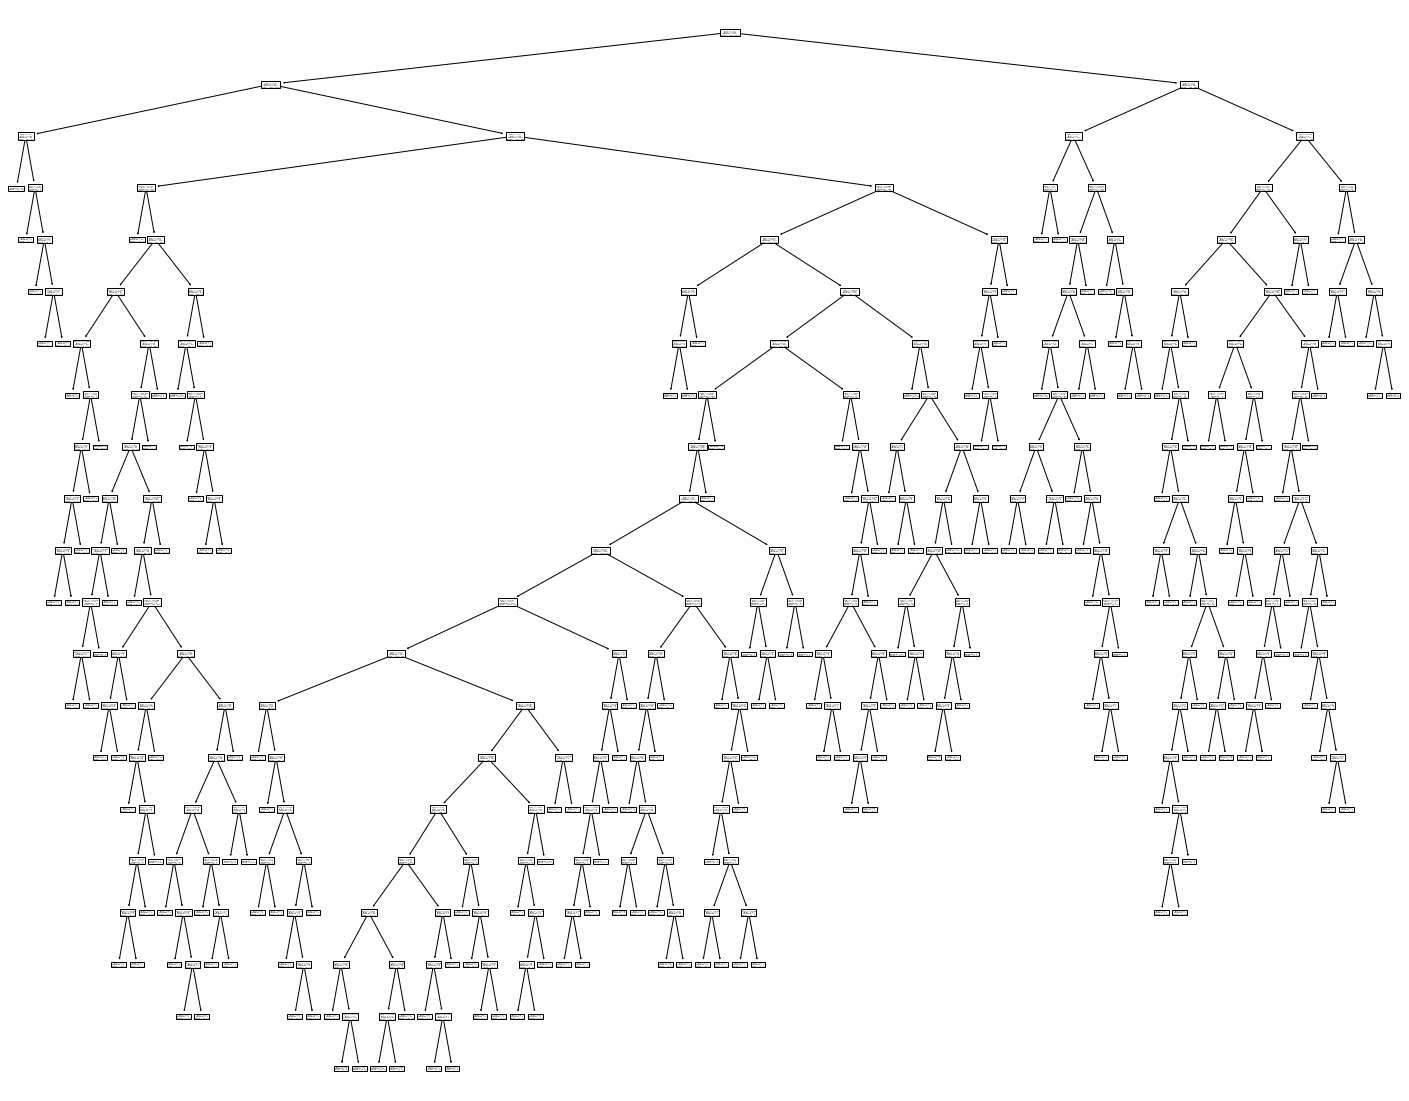

In [89]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)

It works as a binary tree and each leaf is a condition

e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 10 points**

Accuracy on testing set =  0.8157894736842105


/var/folders/ww/d7wtsh5d2_15mpscsx0sq_m00000gn/T/ipykernel_51638/66999313.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare'] = X_test['Fare'].fillna(0)


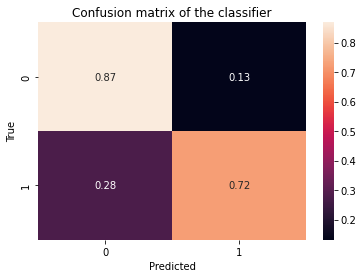

In [88]:
answer = pd.read_csv('./gender_submission.csv', index_col = 0)
answer = np.array(answer).reshape(1,-1)
X_test = df_test[['Pclass','Sex','Age','Fare','total']]
X_test['Fare'] = X_test['Fare'].fillna(0)
prediction = clf.predict(np.array(X_test))
print("Accuracy on testing set = ", accuracy_score(answer[0], prediction))
cm = confusion_matrix(answer[0], prediction, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Some of the leaves are wrong 

f) Tune the parameters of the decision tree to improve its performance. Explain what you tried and what you observed. **- 5 points**

In [94]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(np.array(X_train), np.array(Y_train))
prediction = clf.predict(np.array(X_test))
print("Accuracy on testing set = ", accuracy_score(answer[0], prediction))

Accuracy on testing set =  0.9665071770334929


When changed the max depth to 3 the accuracy imporved a lot

g) Reduce the dimension of the dataset to 5 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? Explain. **- 10 points**

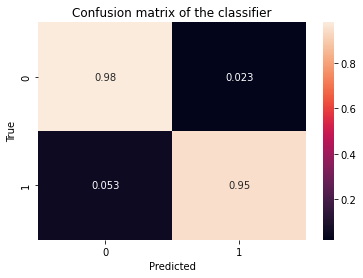

In [95]:
cm = confusion_matrix(answer[0], prediction, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

My previous model already has a dimension of 5 and it's pretty accurate